In [6]:
import pandas as pd
import numpy as np
url="/content/telco.csv"
df=pd.read_csv(url)
df=pd.DataFrame(df)
df.head(4)


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services


In [7]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [8]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

**Imputation of Null Values**

In [11]:
df['Offer'].fillna('unknown',inplace=True)
df['Internet Type'].fillna('unknown',inplace=True)
df['Churn Category'].fillna('unknown',inplace=True)
df['Churn Reason'].fillna('unknown',inplace=True)

In [12]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download  

In [14]:
## categorical varibales to  numerical varibales['Phone Service','Multiple Lines','Internet Service']
## executive_services ['Online Security', 'Online Backup', 'Device Protection Plan']
## premium_services = ['Premium Tech Support']
## entertainment_services =['Streaming TV', 'Streaming Movies', 'Streaming Music']


**Analysis of the customer segmentation**

In [24]:
df[[('Phone Service'),('Multiple Lines'),('Internet Service'),('Online Security'),('Online Backup'),('Device Protection Plan'),('Premium Tech Support'),('Streaming TV'),('Streaming Movies'),('Streaming Music')]]

,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music
0,No,No,Yes,No,No,Yes,No,No,Yes,No
1,Yes,Yes,Yes,No,Yes,No,No,No,No,No
2,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
3,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No
4,Yes,Yes,Yes,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,No,No,No,No,No,No,No,No,No
7039,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
7040,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes
7041,No,No,Yes,Yes,No,No,No,No,No,No


**Model Building by customer segmentation**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
# Impute missing values using the most frequent strategy
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
# Convert categorical variables into numerical format using dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
# Define customer categories based on services opted for
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

# Create new columns for each customer category
df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

# Step 4: Select features and target variable
features = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

X = df[features]
y = df[target]

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Perform Classification Analysis using Random Forest
# Fit a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict churn category
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_test))

# Step 7: Predict Churn Category for New Data
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({
    'Basic Services': [3],
    'Executive Services': [2],
    'Premium Services': [1],
    'Entertainment Services': [0]
})

predicted_churn_category = model.predict(new_data)
print(f'Predicted Churn Category: {predicted_churn_category[0]}')

Train Accuracy: 0.3876464323748669
Test Accuracy: 0.3697657913413769
Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.09      0.13       187
           2       0.00      0.00      0.00       114
           3       0.39      0.85      0.54       547
           4       0.25      0.11      0.15       346
           5       0.00      0.00      0.00       215

    accuracy                           0.37      1409
   macro avg       0.19      0.21      0.16      1409
weighted avg       0.25      0.37      0.26      1409

Confusion Matrix:
[[ 16   0 153  18   0]
 [ 11   0  97   6   0]
 [ 12   1 467  67   0]
 [  8   1 298  38   1]
 [  6   0 183  26   0]]
Predicted Churn Category: 3


**Out put indicates** around 38% of time the model can predict the classification correctly in the training dataset
Around 36% of the time the model can predict the classification correctly in the test dataset.The precision and recall are particularly low for classes 2 and 5, indicating the model struggles to correctly predict these classes.
The model has relatively better performance for class 3, with a recall of 0.85 and an f1-score of 0.54.

In order to the Improve the model, we are using the Ensemble Technic, improve the model accuracy (Gradient Boosting classifier & XGB classifier)

In [32]:
### Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
# Impute missing values using the most frequent strategy
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
# Convert categorical variables into numerical format using dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
# Define customer categories based on services opted for
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

# Create new columns for each customer category
df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

# Select features and target variable
features = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define Hyper Parameter Models**

In [33]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the models
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

**Perform Hyperparameter Tuning**

In [34]:
# Perform GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

ValueError: 
All the 360 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]


**Observations:Under the XGBoost the Expected input from 0 1 2 3 4, but the received input was from 1, so we made changes accordingly**

**Adjusting Class Labels**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
# Impute missing values using the most frequent strategy
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
# Convert categorical variables into numerical format using dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
# Define customer categories based on services opted for
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

# Create new columns for each customer category
df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

# Select features and target variable
features = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

X = df[features]
y = df[target]

# Adjust class labels to start from 0
y = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the models
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Perform GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

# Get the best models and their parameters
best_gb_model = gb_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

# Predict using the best models
y_pred_gb = best_gb_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the models
print("Gradient Boosting Model")
print(f'Best Parameters: {gb_grid_search.best_params_}')
print(f'Test Accuracy: {best_gb_model.score(X_test, y_test)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['1', '2', '3', '4', '5']))

print("\nXGBoost Model")
print(f'Best Parameters: {xgb_grid_search.best_params_}')
print(f'Test Accuracy: {best_xgb_model.score(X_test, y_test)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['1', '2', '3', '4', '5']))

Gradient Boosting Model
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Test Accuracy: 0.38963804116394607
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       187
           2       0.00      0.00      0.00       114
           3       0.39      1.00      0.56       547
           4       1.00      0.01      0.01       346
           5       0.00      0.00      0.00       215

    accuracy                           0.39      1409
   macro avg       0.28      0.20      0.11      1409
weighted avg       0.40      0.39      0.22      1409


XGBoost Model
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Test Accuracy: 0.38821859474804826
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       187
           2       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Observations: Precision, recall, and F1-score are very low for all classes except class 3.
Class 3 has a high recall (1.00), meaning the model predicts almost all instances of this class correctly.
Other classes have a recall of 0.00, indicating the model is not predicting these classes correctly.

**Steps to Address Class Imbalance and Improve Model**

**Check Class Distribution**

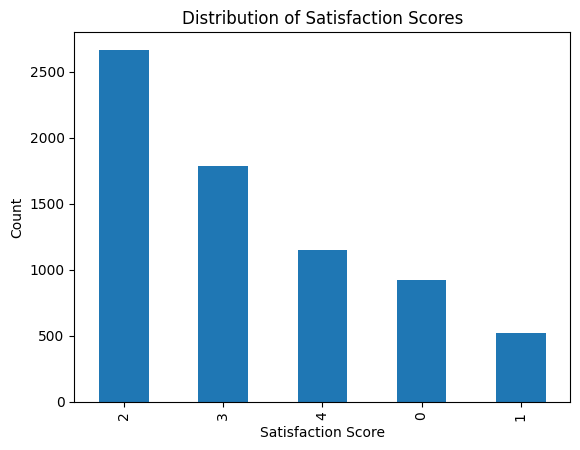

In [36]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable
y.value_counts().plot(kind='bar')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Scores')
plt.show()

**Use SMOTE to Address Class Imbalance**

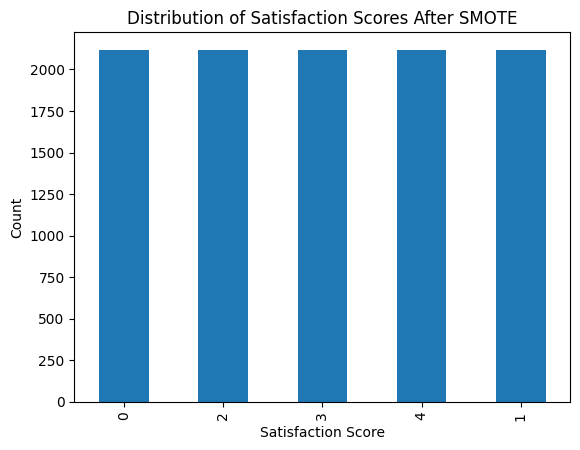

In [37]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
pd.Series(y_train_balanced).value_counts().plot(kind='bar')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Scores After SMOTE')
plt.show()

**Retrain Models with Balanced Data**

In [38]:
# Perform GridSearchCV for Gradient Boosting with balanced data
gb_grid_search_balanced = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid_search_balanced.fit(X_train_balanced, y_train_balanced)

# Perform GridSearchCV for XGBoost with balanced data
xgb_grid_search_balanced = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search_balanced.fit(X_train_balanced, y_train_balanced)

# Get the best models and their parameters
best_gb_model_balanced = gb_grid_search_balanced.best_estimator()
best_xgb_model_balanced = xgb_grid_search_balanced.best_estimator()

# Predict using the best models
y_pred_gb_balanced = best_gb_model_balanced.predict(X_test)
y_pred_xgb_balanced = best_xgb_model_balanced.predict(X_test)

# Evaluate the models
print("Gradient Boosting Model with Balanced Data")
print(f'Best Parameters: {gb_grid_search_balanced.best_params_}')
print(f'Test Accuracy: {best_gb_model_balanced.score(X_test, y_test)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_balanced, target_names=['1', '2', '3', '4', '5']))

print("\nXGBoost Model with Balanced Data")
print(f'Best Parameters: {xgb_grid_search_balanced.best_params_}')
print(f'Test Accuracy: {best_xgb_model_balanced.score(X_test, y_test)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_balanced, target_names=['1', '2', '3', '4', '5']))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

**Observation: 'best_estimator is not a attribute, but its a property**

In [39]:
# Perform GridSearchCV for Gradient Boosting with balanced data
gb_grid_search_balanced = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid_search_balanced.fit(X_train_balanced, y_train_balanced)

# Perform GridSearchCV for XGBoost with balanced data
xgb_grid_search_balanced = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search_balanced.fit(X_train_balanced, y_train_balanced)

# Get the best models and their parameters
best_gb_model_balanced = gb_grid_search_balanced.best_estimator_
best_xgb_model_balanced = xgb_grid_search_balanced.best_estimator_

# Predict using the best models
y_pred_gb_balanced = best_gb_model_balanced.predict(X_test)
y_pred_xgb_balanced = best_xgb_model_balanced.predict(X_test)

# Evaluate the models
print("Gradient Boosting Model with Balanced Data")
print(f'Best Parameters: {gb_grid_search_balanced.best_params_}')
print(f'Test Accuracy: {best_gb_model_balanced.score(X_test, y_test)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_balanced, target_names=['1', '2', '3', '4', '5']))

print("\nXGBoost Model with Balanced Data")
print(f'Best Parameters: {xgb_grid_search_balanced.best_params_}')
print(f'Test Accuracy: {best_xgb_model_balanced.score(X_test, y_test)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_balanced, target_names=['1', '2', '3', '4', '5']))

Gradient Boosting Model with Balanced Data
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
Test Accuracy: 0.27111426543647976
Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.40      0.29       187
           2       0.13      0.25      0.17       114
           3       0.56      0.20      0.30       547
           4       0.27      0.15      0.19       346
           5       0.24      0.53      0.33       215

    accuracy                           0.27      1409
   macro avg       0.29      0.31      0.26      1409
weighted avg       0.36      0.27      0.27      1409


XGBoost Model with Balanced Data
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Test Accuracy: 0.27111426543647976
Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.41      0.29       187
           2

Observation:Due to SMOTE to Address Class Imbalance, and using then using the Boosting technics the model had a reasonably decent score in all the classifcations from 1 to 5 for precision, recall & f1-score when comparied to the previous scenarios.